# Analisis exploratorio de datos (*AED*)

- Para esta unidad vamos a trabajaron con las bibliotecas antes vistas y vamos a introducir algunas funcionalidades de __*sklearn*__

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

## Aprendizaje supervisado

En el aprendizaje **supervisado** nuestro modelo intenta deducir una funcion que nos permita predecir el valor de salida de cualquier objeto de entrada valido.

Para ello los algoritmos **\"generalizan\"** a partir de un conjunto de datos de ejemplo (o entrenamiento).

Los algoritmos pueden clasificarse en 2 casos: de **Regresion** o de **Clasificacion**.

#### Regresión

- Las salidas consisten en una o mas variables continuas
- **Ejemplo:** predecir la lonjitud de un salmón dados su edad y su peso

#### Clasificación

- Existe un conjunto discreto de posibles salidas
- Se desea *\"clasificar\"* las entradas con alguna de ellas
- **Ejemplo:** identificar si un mail es "spam" o "no spam"

## AED

Antes de crear cualquier algoritmo, debemos asegurarnos que los datos son confiables.
- Verificando la calidad y precision de los mismos

Para ello *AED* enfatiza la importancia de organizar y desplegar los datos **gráficamente**.

### Ejemplo: *regresión lineal*

Consiste en identificar con precisíon una línea que sea capaz de representar la distribucion de puntos en un plano bidimensional.

Para el ejemplo vamos los datos de un csv de ejemplo:

In [2]:
data = pd.read_csv("examples/regresion_lineal.csv")
xs = data.x.values.reshape(len(data), 1)  # Convertimos los valores en una matriz de N x 1
ys = data.y.values.reshape(len(data), 1)  # "

data.head()

,x,y
0,0,6
1,1,25
2,2,10
3,3,28
4,4,29


Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba:

In [3]:
 # Vamos a utilizar 80% de los datos como datos de entrenamiento
training_amount = int(0.8 * len(xs))

training_data = { "xs": xs[:training_amount], "ys": ys[:training_amount] }
test_data = { "xs": xs[training_amount:], "ys": ys[training_amount:] }

Generamos la regresion lineal a partir de los datos de entrenamiento, para ello utilizamos el modulo `linear_model` de `sklearn`:

In [4]:
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(training_data["xs"], training_data["ys"])

LinearRegression()

Visualizamos la correspondencia entre los valores de entrenamiento y los valores de Y predichos para los mismos:

- Graficamos los valores predichos como una recta y utilizamos `scatter` para los valores reales

In [5]:
import matplotlib.pyplot as plt

def plot_prediction(real_data, predictions, title, real_color="pink"):
    plt.plot(real_data["xs"], predictions, color="black", linewidth=2)
    plt.scatter(real_data["xs"], real_data["ys"], color=real_color)

    plt.title(title)
    plt.show()

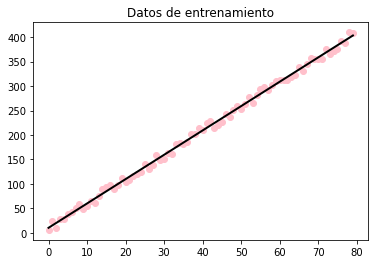

In [6]:
predicted_ys = linear_regressor.predict(training_data["xs"])
               
plot_prediction(training_data, predicted_ys, title="Datos de entrenamiento")

Ahora podemos utilizar el modelo para predecir los valores de Y de los datos de prueba:

In [7]:
predicted_ys = linear_regressor.predict(test_data["xs"])

Luego, analogamente, podemos visualizar si los valores predichos se corresponden o no a los valores de Y reales.

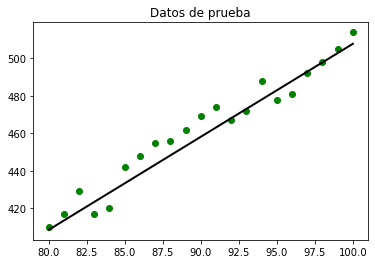

In [8]:
plot_prediction(
    test_data, 
    predicted_ys, 
    title="Datos de prueba", 
    real_color="green"
)

##### ¿Cómo evaluamos la regresion lineal?

Para ello utilizamos el modulo `sklearn.metrics`, que nos permite calcular:
- **Error absoluto medio:** promedio de errores absolutos
- **Error cuadratico medio:** promedio de los cuadrados de los errores
- **Error absoluto mediano:** la *mediana* de todos los errores
    - Es robusta a valores atipicos
- **Puntuacion de varianza explicada:** mide que tan bien nuestro modelo puede explicar la variacion en nuestro conjunto de datos
    - Una puntuacion de 1.0 indica que el modelo es perfecto
- **Puntuacion R2:** Indica que tan bien serán predichas las muestras desconocidas por nuestro modelo
    - La mejor puntuacion es 1.0
    - La puntuacion *puede* ser negativa

In [9]:
import sklearn.metrics as sm

def print_metrics(real, predicted):
    mean_absolute_error = round(sm.mean_absolute_error(real, predicted), 2)  # Redondeamos a 2 decimales
    mean_squared_error = round(sm.mean_squared_error(real, predicted), 2)
    median_absolute_error = round(sm.median_absolute_error(real, predicted), 2)
    explained_variance_score = round(sm.explained_variance_score(real, predicted), 2)
    r2_score = round(sm.r2_score(real, predicted), 2)
    
    print(f"Error absoluto medio: {mean_absolute_error}")
    print(f"Error cuadratico medio: {mean_squared_error}")
    print(f"Error absoluto mediano: {median_absolute_error}")
    print(f"Puntuacion de varianza explicada: {explained_variance_score}")
    print(f"Puntuacion R2: {r2_score}")

In [10]:
print_metrics(test_data["ys"], predicted_ys)

Error absoluto medio: 6.33
Error cuadratico medio: 54.72
Error absoluto mediano: 6.94
Puntuacion de varianza explicada: 0.95
Puntuacion R2: 0.94


#### Regresión contraida

Es otro algoritmo para el calculo de un modelo de regresion lineal. El algoritmo busca amortiguar el impacto que podrian tener algunos valores aislados dentro de nuestro conjunto de datos que se alejan de la dispersión.

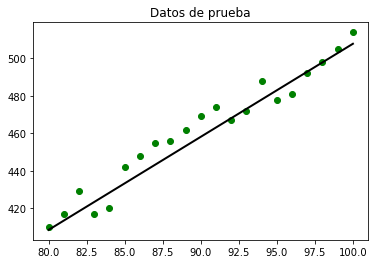

In [11]:
regresion_ridge = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
regresion_ridge.fit(training_data["xs"], training_data["ys"])

predicted_ys = regresion_ridge.predict(test_data["xs"])

plot_prediction(
    test_data,
    predicted_ys,
    title="Datos de prueba",
    real_color="green"
)

In [12]:
print_metrics(test_data["ys"], predicted_ys)

Error absoluto medio: 6.33
Error cuadratico medio: 54.72
Error absoluto mediano: 6.94
Puntuacion de varianza explicada: 0.95
Puntuacion R2: 0.94


- Como los datos de ejemplo no tienen puntos aislados, ambos algoritmos llegan a los mismos resultados

### Ejemplo: *Regresion logistica* (clasificación)

Es un modelo lineal para la **clasificacion**.

Tambien se la conoce como:
- Regresión logit
- Clasificacion de maxima entropia (MaxEnt)
- Clasificador log-lineal

In [13]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

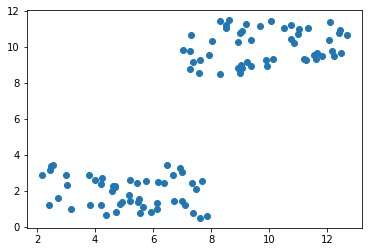

In [14]:
data = pd.read_csv("examples/clasificacion.csv")
plt.scatter(data.x, data.y)
plt.show()

- Podemos ver facilmente que los datos se pueden "clasificar" en 2 conjuntos

De los datos (que cononcemos) podemos tomar un conjunto de entranamiento, clasificando los datos manualmente:

In [15]:
n_points = len(data) - 1   # Cantidad de puntos (resto uno porque los nombres de las columnas cuentan)

training_percentaje = 0.8  # Vamos a usar el 80% de cada clase para entrenar el algoritmo
n_training_sample = int(training_percentaje * n_points)

training_data = data.sample(n=n_training_sample)
training_data_classifications = training_data.classification.values

# Obtenemos el conjunto de prueba a partir de los datos que no estan contenidos en en conjunto de entrenamiento
common = data.merge(training_data, on=["x", "y"])
test_data = data[~data.x.isin(common.x)&~data.y.isin(common.y)]

- Sabemos que la primera mitad de los datos pertenece a la clase 0 y la otra a la 1
    - Lo se porque yo cree los datos, en la realidad, deberiamos poder clasificar un conjunto de ellos manualmente proponiendo una hipotesis que los clasifique. En este caso la hipotesis es que la primera mitad pertenece a un grupo y la otra al otro.

Ahora utilizamos `LogisticRegresion` para crear un objeto clasificador y lo ajustamos usando `fit`

In [16]:
classificator = linear_model.LogisticRegression(solver="lbfgs", C=100)
classificator.fit(training_data[["x", "y"]], training_data_classifications)

LogisticRegression(C=100)

In [17]:
print("Prediction: \n", classificator.predict(training_data[["x", "y"]]), "\n")
print("Score: %f" % classificator.score(training_data[["x", "y"]], training_data_classifications))

Prediction: 
 [1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 0] 

Score: 1.000000


Ahora podemos probar como funciona el modelo utilizando nuestras datos de prueba:

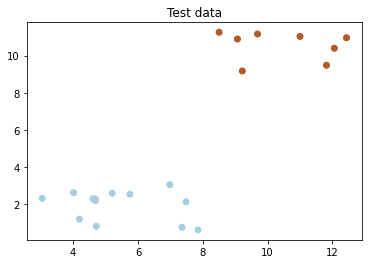

In [18]:
predictions = classificator.predict(test_data[["x", "y"]])

plt.scatter(test_data.x, test_data.y, c=predictions, cmap=plt.cm.Paired)
plt.title("Test data")
plt.show()

Y si incluimos todos los datos:

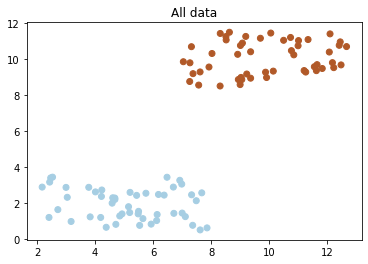

In [19]:
predictions = classificator.predict(data[["x", "y"]])

plt.scatter(data.x, data.y, c=predictions, cmap=plt.cm.Paired)
plt.title("All data")
plt.show()

Ahora podemos visualizar como predeciria, nuestro modelo, todos los puntos del plano (aproximadamente) de forma grafica. Pero para ello primero hay que entender como funcionan las funciones:
- `meshgrid()`
- `arange()`
- `pcolormesh()`
- `ravel()`

`arange()` nos permite generar numeros entre dos valores \[a; b) separados por un valor o "step"

In [20]:
print(np.arange(5, 10, 0.5))

[5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]


`meshgrid` nos ayuda a generar todos los valores centros de una "grilla" dados los valores de cada una de sus columnas (X) y filas (Y)

In [21]:
columnas = [0, 1, 2, 3, 4]  # Posicion en X donde estara cada columna
filas = [0, 3, 6, 9, 12]  # posicion en Y donde estará cada fila

c_xs, c_ys = np.meshgrid(columnas, filas)

print(c_xs)
print(c_ys)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[ 0  0  0  0  0]
 [ 3  3  3  3  3]
 [ 6  6  6  6  6]
 [ 9  9  9  9  9]
 [12 12 12 12 12]]


Si quicieramos obtener los centros de los cuadros utilizamos la funcion `ravel()` y `c_`, que funciona de forma similar a `zip`. `ravel()` convierte a nuestra matriz en un array 1D concantenando todas sus filas una atras de la otra.
- Una funcion muy parecida a `ravel` es `flatten` que hace lo mismo pero es mas lenta, ya que, a diferencia de la primera, NO retorna una referencia a la matriz original

In [22]:
centros = np.c_[c_xs.ravel(), c_ys.ravel()]
print(centros)

[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 0  3]
 [ 1  3]
 [ 2  3]
 [ 3  3]
 [ 4  3]
 [ 0  6]
 [ 1  6]
 [ 2  6]
 [ 3  6]
 [ 4  6]
 [ 0  9]
 [ 1  9]
 [ 2  9]
 [ 3  9]
 [ 4  9]
 [ 0 12]
 [ 1 12]
 [ 2 12]
 [ 3 12]
 [ 4 12]]


Finalmente podemos graficar estas celdas utilizando `pcolormesh` que recive los valores de X e Y de los vertices en el formato devuelto por `meshgrid()` y un array que permite clasificar a cada cuadro para así definir su color. Este ultimo debe tener la misma forma que los dos anteriores.

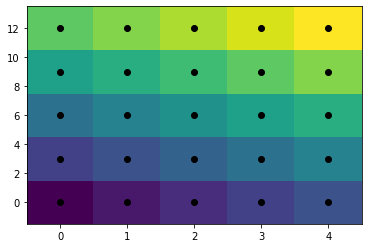

In [23]:
def funcion_clasificadora(punto):
    return punto[0] + punto[1]

clasificacion = np.array([ funcion_clasificadora(p) for p in centros ])  # Utilizamos los centros para clasificarlos como se desee

plt.pcolormesh(c_xs, c_ys, clasificacion.reshape(c_xs.shape), shading="auto")  # Importante que la clasificacion tenga el mismo formato que los demas arrays
plt.scatter(centros[:, 0], centros[:, 1], color="black")
plt.show()

Finalmente podemos aplicar esto ultimo a nuestro ejemplo para visualizar como clasifica nuestro modelo todos los puntos del plano:

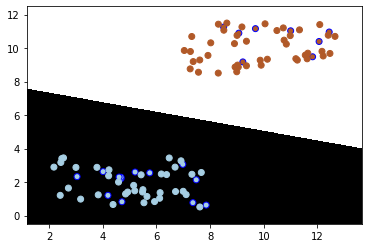

In [24]:
# Obtenemos los valores minimos y maximos de cada eje para definir las dimensiones de la grilla

x_min = min(data.x) - 1
x_max = max(data.x) + 1

y_min = min(data.y) - 1
y_max = max(data.y) + 1


# Definimos los centros de la grilla

step_size = 0.01  # Tomamos un "step" pequeños para tener en cuenta la mayor cantidad de puntos
cols = np.arange(x_min, x_max, step_size)
rows = np.arange(y_min, y_max, step_size)
c_xs, c_ys = np.meshgrid(cols, rows)
centers = np.c_[c_xs.ravel(), c_ys.ravel()]

classification = classificator.predict(centers)

plt.pcolormesh(c_xs, c_ys, classification.reshape(c_xs.shape), cmap=plt.cm.gray, shading="auto")


# Imprimimos los datos por encima de nuestra grilla

test_predictions = classificator.predict(test_data[["x", "y"]])
training_predictions = classificator.predict(training_data[["x", "y"]])

plt.scatter(test_data.x, test_data.y, c=test_predictions, cmap=plt.cm.Paired, edgecolors="blue")  # Bordeamos de color azul los puntos que se utilizar como pruebas
plt.scatter(training_data.x, training_data.y, c=training_predictions, cmap=plt.cm.Paired)

plt.show()

- Se puede ver claramente porque se trata de un modelo de clasificacion **"lineal"**